# Iris Flowers Classification

We will use Keras to create a machine learning model to classify Iris flowers.

We will perform the task as follows:

1. Load a prebuilt dataset.
2. Build a neural network machine learning model that classifies data.
3. Train this neural network.
4. Evaluate the accuracy of the model.

We will use the Iris dataset containing data about three different species of iris flowers: Setosa, Versicolor, and Virginica.

The data represents four features of the iris flower:
* sepal length,
* sepal width,
* petal length,
* petal width.

The following figure shows the iris species:

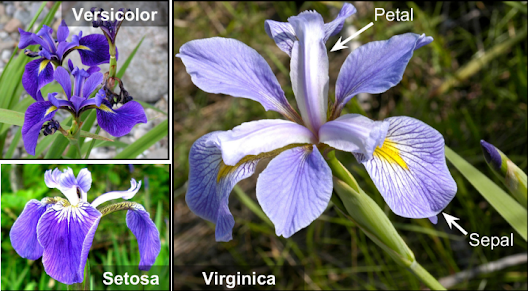

## Imports

In [ ]:
# imports
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam

## Load the Iris Dataset

Key characteristics of the Iris dataset:

* Samples: 150 samples of iris flowers.
* Classes/Species: 3 different species of iris flowers: Setosa, Versicolor, and Virginica. Each species has 50 samples.
* Features: 4 features for each sample, all measured in centimeters:
    * Sepal Length
    * Sepal Width
    * Petal Length
    * Petal Width
* Target Variable: The species of the iris flower, typically represented numerically (e.g., 0 for Setosa, 1 for Versicolor, 2 for Virginica).


In [ ]:
# load the iris dataset
iris = load_iris()

Explore the features and the target (species):

In [ ]:
# access the features and the target (species)
features = iris.data
target = iris.target

print('Features:')
print(features[:5])
print('Target:')
print(target[:5])

Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:
[0 0 0 0 0]


### Transform the target data

We will build a neural network that has an output layer with three neurons: each corresponds to one category (species).

As the target data is represented in a 1d arry, we need to transform the data so that a target data point is represented in one of the following forms:
* `[1, 0, 0]`: if the data point corresponds to the first category (species: Setosa).
* `[0, 1, 0]`: if the data point corresponds to the second category (species: Versicolor).
* `[0, 0, 1]`: if the data point corresponds to the second category (species: Virginica).

To achieve this, we will to transform the target data in two steps as follows:

* First step: reshape the target data to a 2d array with a single column.
* Second step: transform this single column to three columns.

#### Reshape the target data

In [ ]:
# reshape target data to a single column
target_reshaped = target.reshape(-1, 1)

print(target_reshaped[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


#### Transform the target data

We use the scikit-learn `OneHotEncoder` tool for transfrom the target data (species).

`OneHotEncoder` creates new binary columns.<br>
Each new column represents a unique category within the target feature.<br>
For a given data point, the column corresponding to its category will have a value of 1, while all other columns for that feature will have a value of 0.

In [ ]:
# encode the target class labels
encoder = OneHotEncoder(sparse_output=False)
target_encoded = encoder.fit_transform(target_reshaped)

Show target datapoints for the three categories (iris flower species):

In [ ]:
# show target datapoints for three categories
print('Target data point from first category:')
print(target_encoded[0])

print('Target data point from second category:')
print(target_encoded[50])

print('Target data point from third category:')
print(target_encoded[100])

Target data point from first category:
[1. 0. 0.]
Target data point from second category:
[0. 1. 0.]
Target data point from third category:
[0. 0. 1.]


### Split the Data

We split the data into a training set and a test set:

In [ ]:
# split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.20)


## Build the Model

We build a **`Sequential`** model that uses the **`Input`**, **`Dense`**, and **`Dropout`** layers.

We use the **`Input()`** function to define the input layer of a model. This creates a Keras Input tensor, which serves as the starting point for building a graph of layers.

The last layer contains 3 neurons: one for each category (flower species).

The model contains two hidden layers:

* **`Dense`** layer: represents a fully connected (or dense) layer, where every neuron in the layer is connected to every neuron in the previous layer. This layer is essential for building deep learning models, as it is used to learn complex patterns and relationships in data.
* **`Dropout`** layer: randomly sets input units to 0 with a frequency at each step during training time, the frequency value is set in the `rate` argument passed to the class on instanciation. Used to prevent overfitting.
    * `rate`: Float between 0 and 1. Fraction of the input units to drop.

In [ ]:
# build a model
model = Sequential([
  Input(shape=(4,), name='input'),
  Dense(10, activation='relu', name='hidden_1'),
  Dropout(0.2, name='hidden_2'),
  Dense(3, activation='softmax', name='output')
])

#### Neural Network Summary

The **`Model.summary()`** method in Keras provides a concise overview of a model's architecture, including layer names, output shapes, and the number of parameters for each layer.

In [ ]:
# show a summary of the neural network
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dropout)              │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the Model

Before we start training, we configure and compile the model using Keras **`Model.compile`**.

We set the optimizer to `Adam` with a learning rate of `0.001`, the loss function to `categorical_crossentropy`, and the metric to `accuracy`:

In [ ]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)

# compile the model
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## Train the Model

We use the **`Model.fit`** method to train the model: adjust the model parameters and minimize the loss:

In [ ]:
# train the model
model.fit(x_train, y_train, verbose=0, epochs=500)

## Evaluate the Model

The **`Model.evaluate`** method checks the model's performance, usually on a validation set or test set.

In [ ]:
# evaluate the model
model.evaluate(x_test,  y_test, verbose=2)

1/1 - 0s - 263ms/step - accuracy: 0.9667 - loss: 0.1855


[0.18551680445671082, 0.9666666388511658]

## Make Predictions

The **`Model.predict()`** method in Keras is used to generate predictions from a trained deep learning model on new, unseen input data.

We pass an array of inputs to **`Model.predict()`** and it returns an array of outputs.

Keep in mind that the output of our network is 10 probabilities (because of softmax), so we’ll use `np.argmax()` to turn those into actual digits.

In [ ]:
# generate predictions on the first 5 datapoints
predictions = model.predict(x_test[:5])

# print predictions
print(np.argmax(predictions, axis=1))

# check predictions against the ground truths
print(y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[2 1 2 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
